Columnas: ['Depreg', 'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Areag', 'Sexo', 'Diaocu', 'Mesocu', 'Edadif', 'Perdif', 'Getdif', 'Ecidif', 'Escodif', 'Ocudif', 'Pnadif', 'Dnadif', 'Mnadif', 'Nacdif', 'Predif', 'Dredif', 'Mredif', 'Caudef', 'Asist', 'Ocur', 'Cerdef', 'Puedif', 'Ciuodif', 'caudef.descrip', 'Añoocu']
Media de edad: 61.55
Mediana: 62.0
Moda: 1.0
Desviación estándar: 82.41
Percentiles:
0.25    34.0
0.50    62.0
0.75    78.0
Name: Edadif, dtype: float64


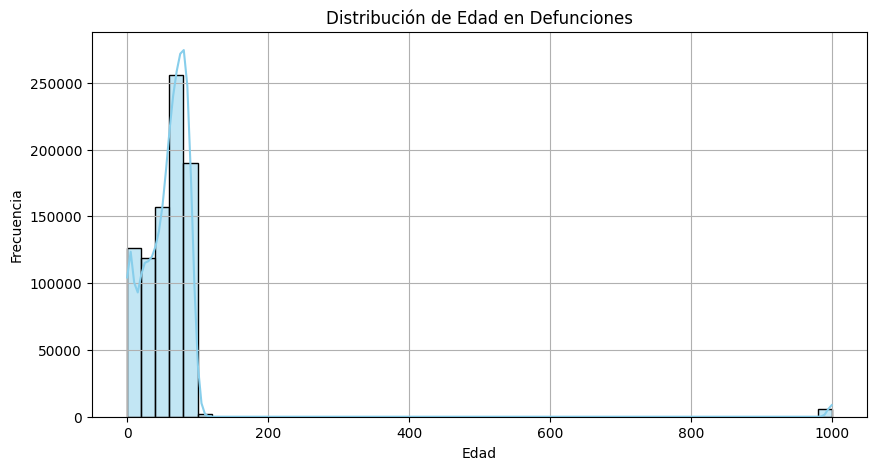

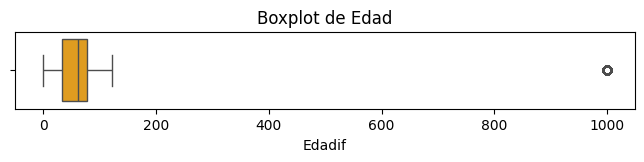


Frecuencia de Sexo:

Sexo
1.0    480556
2.0    374851
Name: count, dtype: int64

Frecuencia de Caudef:

Caudef
I219    61997
J189    46809
E149    33581
R98X    30327
X599    25408
        ...  
Y084        1
J342        1
O340        1
O060        1
N958        1
Name: count, Length: 3118, dtype: int64

Frecuencia de Depocu:

Depocu
1.0     249498
9.0      54541
16.0     50846
5.0      49574
12.0     49537
13.0     47907
14.0     41807
10.0     32196
4.0      30097
8.0      25464
22.0     24668
6.0      23834
17.0     22140
20.0     21297
7.0      20499
18.0     20453
3.0      19527
11.0     17850
21.0     16538
19.0     15500
15.0     12434
2.0       9200
Name: count, dtype: int64

Frecuencia de Escodif:

Escodif
1.0    453598
2.0    233105
4.0     57398
9.0     56472
3.0     40381
5.0     14157
6.0       296
Name: count, dtype: int64

Frecuencia de Puedif:

Puedif
4.0    411148
1.0    217962
9.0    143746
NaN     72657
5.0      9195
3.0       371
2.0       328
Name: count, dtype: i

In [2]:
# Análisis Estadístico de Defunciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv("defunciones.csv", low_memory=False)

# Mostrar las columnas disponibles (opcional)
print("Columnas:", df.columns.tolist())

# Asegurarse de que 'Edadif' sea numérica
df["Edadif"] = pd.to_numeric(df["Edadif"], errors='coerce')

# Eliminar edades negativas o nulas (si las hubiera)
df = df[df["Edadif"] >= 0]

# 🔹 Estadísticas básicas
media = df["Edadif"].mean()
mediana = df["Edadif"].median()
moda = df["Edadif"].mode().values[0]
desviacion = df["Edadif"].std()
percentiles = df["Edadif"].quantile([0.25, 0.5, 0.75])

print("Media de edad:", round(media, 2))
print("Mediana:", mediana)
print("Moda:", moda)
print("Desviación estándar:", round(desviacion, 2))
print("Percentiles:")
print(percentiles)

# 🔹 Histograma de edad
plt.figure(figsize=(10,5))
sns.histplot(df["Edadif"], bins=50, kde=True, color='skyblue')
plt.title("Distribución de Edad en Defunciones")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# 🔹 Boxplot para ver outliers
plt.figure(figsize=(8, 1))
sns.boxplot(x=df["Edadif"], color='orange')
plt.title("Boxplot de Edad")
plt.show()

# 🔹 Tablas de frecuencia para variables categóricas
categoricas = ["Sexo", "Caudef", "Depocu", "Escodif", "Puedif"]

for col in categoricas:
    if col in df.columns:
        print(f"\nFrecuencia de {col}:\n")
        print(df[col].value_counts(dropna=False))
